# 한글 워드크라우드

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 재시작

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [ ]:
#konlpy
!pip install konlpy > /dev/null

In [ ]:
from konlpy.tag import Okt, Kkma, Komoran

In [ ]:
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [ ]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [ ]:
# 한글 형태소 분석기별 차이점
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [ ]:
# 품사 태깅 pos(part-of-speech tagging)
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


# 명사만 추출

In [ ]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


# 새로나온책 200권 tag 워드크라우드 만들기

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 

In [ ]:
# 기존 chromium 삭제
!sudo apt remove chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra

In [ ]:
# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver


# Install selenium
pip install selenium

In [ ]:
!sudo apt update
!sudo apt install chromium

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')   # 화면없이 실행
options.add_argument('--no-sandbox')
options.add_argument("--single-process")
options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome('chromedriver', options=options)

In [ ]:
base_url = 'https://www.hanbit.co.kr'
sub_url = '/store/books/new_book_list.html'
url = base_url + sub_url
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

In [ ]:
lis = soup.select('.sub_book_list')
len(lis)

20

In [ ]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B2604168887'

In [ ]:
res = requests.get(base_url + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [ ]:
tags = book_soup.select('.tag_area > a')
len(tags)

15

In [ ]:
tag_list = []
for a in tags:
  tag_list.append(a.get_text().strip())
print(tag_list)

['pandas', 'NumPy', 'IPython', 'matplotlib', '판다스', '팬더스', '넘파이', '사이파이', '맷플롯립', '주피터', '주피터노트북', '데이터분석', '데이터과학', '데이터시각화', '파이썬']


In [ ]:
tag_list = []
for page in tqdm(range(1, 11)):
  url = f'{base_url}{sub_url}?page={page}'
  res = requests.get(url)
  soup = BeautifulSoup(res.text, 'html.parser')
  lis = soup.select('.sub_book_list')
  for li in lis:
    book_url = li.find('a')['href']
    res = requests.get(base_url + book_url)
    book_soup = BeautifulSoup(res.text, 'html.parser')
    tags = book_soup.select('.tag_area > a')
    for a in tags:
      tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
len(tag_list)

2070

In [ ]:
tag_list[100:150]

# 워드크라우드 만들기
tag_list를 빈도 딕셔너리로 만들기

In [ ]:
tag_set = set(tag_list)
len(tag_set)

1498

In [38]:
tag_dict = {}
for item in tag_set:
  tag_dict[item] = tag_list.count(item)

In [ ]:
# 리스트내포 and 딕셔너리내포
tag_dict = {item : tag_list.count(item) for item in tag_set}

In [39]:
tag_dict

{'크룸': 1,
 '프로그램': 1,
 '풍경화': 1,
 '아이패드 드로잉': 1,
 '다이어리': 1,
 '가설검정': 1,
 '스토어 운영': 1,
 '거시계량': 1,
 '컴퓨팅 사고': 1,
 '함수': 3,
 '열역학': 1,
 '모던C++': 1,
 'DevOps': 4,
 '마케팅': 1,
 '베이지안': 1,
 '우주': 3,
 '친환경자동차': 1,
 '파이썬 프로그래밍': 1,
 '바드': 1,
 '웹 스크래핑': 1,
 '엄마태교': 1,
 '시제품': 1,
 '엄마': 1,
 '포토샵 활용': 1,
 '맛디애프터이펙트': 1,
 '비건': 1,
 '포토샵 CC': 1,
 '수학워크북': 1,
 'EC2': 1,
 '수메르': 1,
 '분산 처리': 1,
 '물리학': 1,
 '선택': 1,
 '상대성이론': 2,
 '추리': 4,
 '정보교과교육': 1,
 '빅데이터 실습': 1,
 'Kendall': 1,
 '주택청약': 1,
 '3D 영상 디자인': 1,
 '프로크리에이트': 1,
 '프리미어 프로 강좌': 1,
 '수채화': 1,
 '한글공부': 5,
 '방콕': 1,
 '기계설계': 1,
 '경제수학': 1,
 '인프라': 2,
 '컴퓨터과학': 1,
 '시공간 초월': 3,
 '방정식': 1,
 'project': 1,
 '핀옵스': 1,
 '하드웨어': 1,
 '테크니컬 라이팅': 1,
 'SSR': 1,
 '메타분석': 1,
 'SNS 초보': 1,
 '웹 해킹': 1,
 '순환 신경망': 1,
 'OS': 1,
 '시본': 1,
 '체코': 1,
 '알고리즘인플루언서': 1,
 '무이네여행': 1,
 '라이브러리': 2,
 '하이브리드 자동차': 1,
 '컴퓨터 비전': 2,
 '태국여행': 1,
 '광고학': 1,
 '힐링 여행': 1,
 '해석기': 1,
 '이모티콘만들기': 1,
 '커뮤니케이션학': 1,
 '기술문서': 1,
 'Hyper-V': 1,
 '코페르니쿠스': 1,
 '애펙': 1,
 '문학': 4,
 

In [41]:
count = 0
for key, value in tag_dict.items():
  # print(key, ':', value)
  count += 1
  if count > 5:
    break

가설검정 : 1


In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [48]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'

In [51]:
wc = WordCloud(background_color='white',font_path=font_path, max_words=500).generate_from_frequencies(tag_dict)

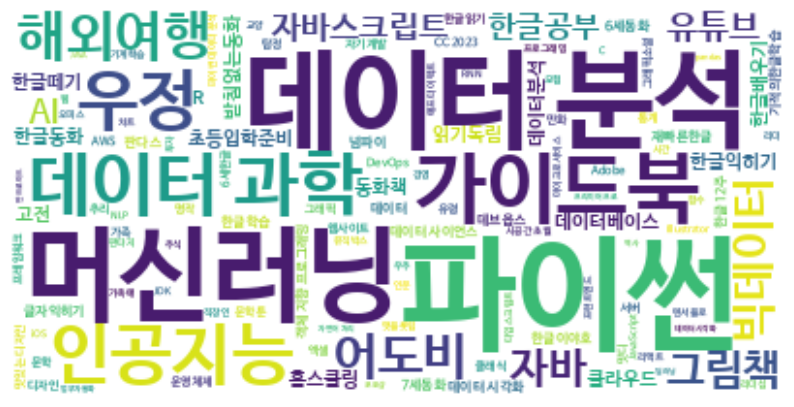

In [52]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()